## Loading training dataset




In [ ]:
# load data

## Basic Info on the Dataset


Random Image


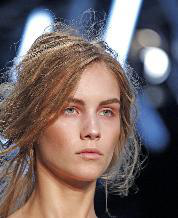

Label: 0 - Female

Random Image


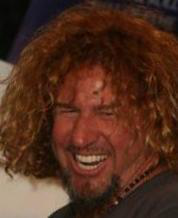

Label: 1 - Male

Random Image


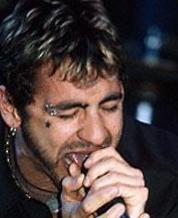

Label: 1 - Male

Random Image


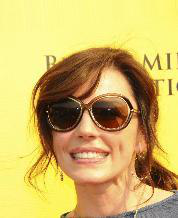

Label: 0 - Female

Random Image


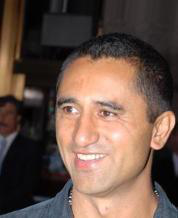

Label: 1 - Male



In [ ]:
from pandas.core.sorting import get_indexer_indexer
random_indexes = np.random.choice(len(data), size=5, replace=False) #gets 5 random indexes

for i in random_indexes:
    image_path = os.path.join("/content/data/celeba_30k/", data.loc[i, "image_id"])
    label = data.loc[i, "Male"] #fetches image and its label

    #the if-else statement below converts label from 0/1 to Female/Male
    if label==1:
      gender_label="Male"
    elif label==0:
      gender_label="Female"

    img = Image.open(image_path) #loads image
    print("Random Image")
    img.show() #displays image
    print("Label:", label,"-",gender_label) #displays label
    print() #an empty line between samples


Dataset shape: (30000, 11)

Dataset memory usage:
 Index                   128
image_id            2010000
Male                 240000
Blond_Hair           240000
Eyeglasses           240000
Wearing_Earrings     240000
Bangs                240000
Young                240000
Smiling              240000
Heavy_Makeup         240000
Straight_Hair        240000
Black_Hair           240000
dtype: int64

Dataset data types:
 image_id            object
Male                 int64
Blond_Hair           int64
Eyeglasses           int64
Wearing_Earrings     int64
Bangs                int64
Young                int64
Smiling              int64
Heavy_Makeup         int64
Straight_Hair        int64
Black_Hair           int64
dtype: object

Label distribution:
 0    0.577333
1    0.422667
Name: Male, dtype: float64



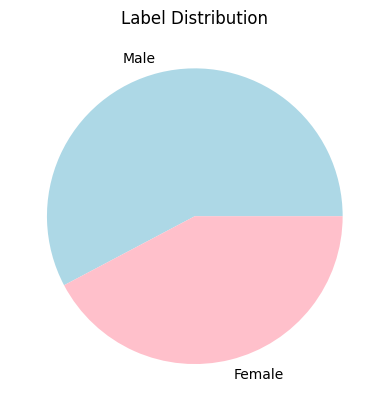

In [ ]:
# Basic information about the dataset
print("Dataset shape:", data.shape)
print() #printing empty lines makes it easier to read the output
print("Dataset memory usage:\n", data.memory_usage(deep=True))
print()
print("Dataset data types:\n", data.dtypes)
print()

# About the distribution of labels
label_counts = data['Male'].value_counts()
total_count = len(data)
label_distribution = label_counts / total_count
print("Label distribution:\n", label_distribution)
print()

#pie chart for the label distribution
colors = ['lightblue', 'pink']
labels = ['Male', 'Female']
plt.pie(label_distribution, labels=labels, colors=colors)
plt.title("Label Distribution")
plt.show()

In [ ]:
#classes are relatively balanced - hence the data is suitable for mini batches

##Splitting the dataset

In [ ]:
gender_data

,image_id,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0
...,...,...
29995,029996.jpg,1
29996,029997.jpg,1
29997,029998.jpg,0
29998,029999.jpg,0


In [ ]:
# Split 80-10-10
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(gender_data, test_size=0.1, random_state=42, shuffle = True)
train_df, test_df = train_test_split(train_df, test_size=1/9, random_state=42, shuffle = True) #since 0.9 * (1/9) = 0.1

In [ ]:
print("No of instances in the train set:",len(train_df))
print("No of instances in the validation set:",len(val_df))
print("No of instances in the test set:",len(test_df))

No of instances in the train set: 24000
No of instances in the validation set: 3000
No of instances in the test set: 3000


In [ ]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torchvision.io import read_image

class CelebADataset(nn.Module):
    def __init__(self, root_dir, img_pths, labels, is_train):
        self.root_dir = root_dir
        self.img_pths = img_pths
        self.labels = labels
        if not is_train:
            self.transform = transforms.Compose([
                transforms.Resize(IMG_SIZE),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize(IMG_SIZE),
                transforms.RandomHorizontalFlip(),
                transforms.ColorJitter(0.3, 0.3, 0.3, 0.3),
                transforms.RandomGrayscale(),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])

    def __len__(self):
        return len(self.img_pths)

    def __getitem__(self, idx):
        img_pth = os.path.join(self.root_dir, self.img_pths[idx])
        image = Image.open(img_pth)
        label = self.labels[idx]
        label = torch.tensor(label, dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        sample = {"img": image, "label": label}
        return sample


# Prepare Datasets

root_dir = "/content/data/celeba_30k/"

train_img_pths = np.array(train_df["image_id"])
train_img_labels = np.array(train_df["Male"])

val_img_pths = np.array(val_df["image_id"])
val_img_labels = np.array(val_df["Male"])

test_img_pths = np.array(test_df["image_id"])
test_img_labels = np.array(test_df["Male"])

train_dataset = CelebADataset(root_dir, train_img_pths, train_img_labels, True)
val_dataset = CelebADataset(root_dir, val_img_pths, val_img_labels, False)
test_dataset = CelebADataset(root_dir, test_img_pths, test_img_labels, False)



In [ ]:
train_dataset[0]

{'img': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [ 1.8550,  1.8550,  1.8550,  ..., -1.9467, -1.9467, -1.9295],
          [ 1.8550,  1.8550,  1.8550,  ..., -1.9124, -1.9124, -1.9124],
          [ 1.8550,  1.8550,  1.8550,  ..., -1.8782, -1.8782, -1.8782]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [ 2.0259,  2.0259,  2.0259,  ..., -1.8606, -1.8606, -1.8431],
          [ 2.0259,  2.0259,  2.0259,  ..., -1.8081, -1.8081, -1.8081],
          [ 2.0259,  2.0259,  2.0259,  ..., -1.7906, -1.7906, -1.7906]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -

## Transfer Learning with VGG-16




In [ ]:
import torchvision.models as models


class VGG16_Updated(nn.Module):
    def __init__(self, num_classes):
        super(VGG16_Updated, self).__init__()
        self.featurizer = models.vgg16(pretrained=True).features

        for n, p in self.featurizer.named_parameters():
            p.requires_grad = False

        # Define a new binary classification head
        self.clf = nn.Sequential(
            nn.Linear(512 * 4 * 4, 4096), #(flattened)output of the VGG-16
                                          #to a fully connected layer w/ 4096 neurons
            nn.ReLU(inplace=True), #introduces non-linearity
                                   #inplace=True to modify tensors inplace and not
                                   #create an additional tensor
            nn.Dropout(), #to prevent overfitting and so that the network can
                          #handle failures
            nn.Linear(4096, 4096),#output of the prev. layer to a fully connected layer w/ 4096 neurons
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes), #output of the prev. layer to final layer
                                          #num_classes as the sigmoid will give
                                          #probabilities of belonging to each class
            nn.Sigmoid()) #as this is a binary classification task

    def forward(self, x):
        B, C, H, W = x.shape
        feats = self.featurizer(x)
        # flatten
        feats =  feats.view(B, -1)# B for batch size & -1 for getting dimension based
                                  #on other dims and no of elements in tensor
        out = self.clf(feats)
        return out



In [ ]:
print(VGG16_Updated(2)) #the network architecture

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG16_Updated(
  (featurizer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0

We need a binary classifier (Male/Female) which we will add manually on top of the pre-trained model. This layer is usually called "classification head".


In [ ]:
def train_one_epoch(train_dataloader, opt):
    model.train()
    accs = []
    losses = []
    start = time.time()
    for i, sample in enumerate(train_dataloader):
        imgs = sample["img"]
        labels = sample["label"]
        # send data to device
        imgs = imgs.cuda()
        labels = labels.cuda()

        logits = model(imgs) # take predictions
        loss = F.cross_entropy(logits, labels) # calculate loss

        preds = torch.argmax(logits, dim=1) # convert predictions into labels
        correct = torch.sum(torch.eq(preds.int(), labels.int()).float()) # count # of correct preds

        clf_accuracy = correct / imgs.shape[0] # calculate accuracy

        accs.append(clf_accuracy.cpu())
        losses.append(loss.item())
        # take a step to optimize model params
        opt.zero_grad()
        loss.backward()
        opt.step()

    time_elapsed = time.time() - start
    acc = np.mean(accs)
    loss = np.mean(losses)
    return {"acc": acc, "loss": loss, "time": time_elapsed}


def test_val_one_epoch(dataloader):
    model.eval()
    accs = []
    losses = []
    start = time.time()
    with torch.no_grad():
        for i, sample in enumerate(dataloader):
            imgs = sample["img"]
            labels = sample["label"]
            # send data to device
            imgs = imgs.cuda()
            labels = labels.cuda()

            logits = model(imgs) # take predictions
            loss = F.cross_entropy(logits, labels) # calculate loss

            preds = torch.argmax(logits, dim=1) # convert predictions into labels
            correct = torch.sum(torch.eq(preds.int(), labels.int()).float()) # calculate # of correct preds

            clf_accuracy = correct / imgs.shape[0] # calculate accuracy
            accs.append(clf_accuracy.cpu())
            losses.append(loss.item())
    time_elapsed = time.time() - start
    acc = np.mean(accs)
    loss = np.mean(losses)
    return {"acc": acc, "loss": loss, "time": time_elapsed}


## Fine-Tuning the Model


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]


-MODEL FOR-
Optimizer: adam
Learning Rate: 0.001
Batch Size: 32
Training: epoch: 1, loss: 0.69, accuracy: 60.09 in 146.45 seconds
Validation: epoch: 1, loss: 0.69, accuracy: 57.71 in 11.37 seconds
Training: epoch: 2, loss: 0.69, accuracy: 57.63 in 136.21 seconds
Validation: epoch: 2, loss: 0.69, accuracy: 57.71 in 9.73 seconds
Training: epoch: 3, loss: 0.69, accuracy: 57.63 in 135.12 seconds
Validation: epoch: 3, loss: 0.69, accuracy: 57.71 in 10.03 seconds
Training: epoch: 4, loss: 0.69, accuracy: 57.63 in 134.73 seconds
Validation: epoch: 4, loss: 0.69, accuracy: 57.71 in 10.09 seconds
No improvement for 3 epochs. Training stopped early.


<ipython-input-19-301b0e1e8ee4>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


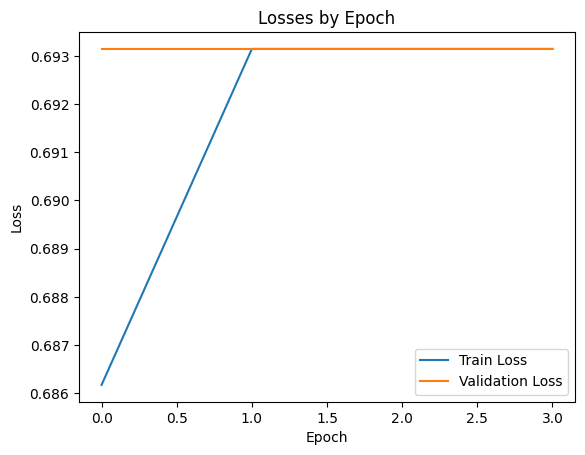

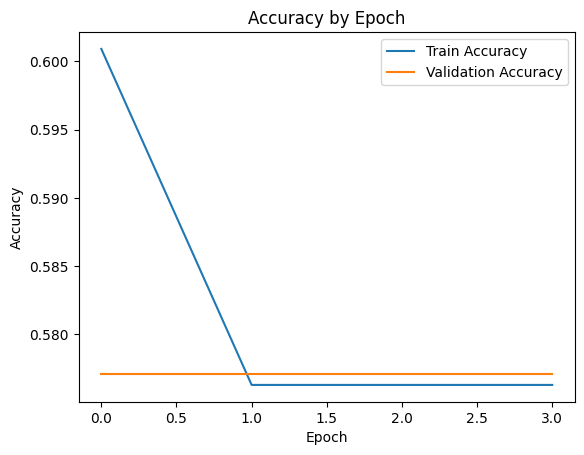


  optimizer     lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.001         32    0.693147   0.576292  0.693147  0.577128   

   train_time_elapsed  valid_time_elapsed  
0          134.728972           10.085009  


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: adam
Learning Rate: 0.0001
Batch Size: 32
Training: epoch: 1, loss: 0.41, accuracy: 89.81 in 133.98 seconds
Validation: epoch: 1, loss: 0.41, accuracy: 90.36 in 9.14 seconds
Training: epoch: 2, loss: 0.40, accuracy: 91.03 in 133.81 seconds
Validation: epoch: 2, loss: 0.39, accuracy: 92.32 in 9.96 seconds
Training: epoch: 3, loss: 0.40, accuracy: 91.11 in 133.05 seconds
Validation: epoch: 3, loss: 0.39, accuracy: 92.14 in 9.11 seconds
Training: epoch: 4, loss: 0.40, accuracy: 91.22 in 132.61 seconds
Validation: epoch: 4, loss: 0.40, accuracy: 91.38 in 9.89 seconds
Training: epoch: 5, loss: 0.40, accuracy: 91.33 in 132.63 seconds
Validation: epoch: 5, loss: 0.39, accuracy: 92.04 in 9.34 seconds
No improvement for 3 epochs. Training stopped early.


<ipython-input-19-301b0e1e8ee4>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


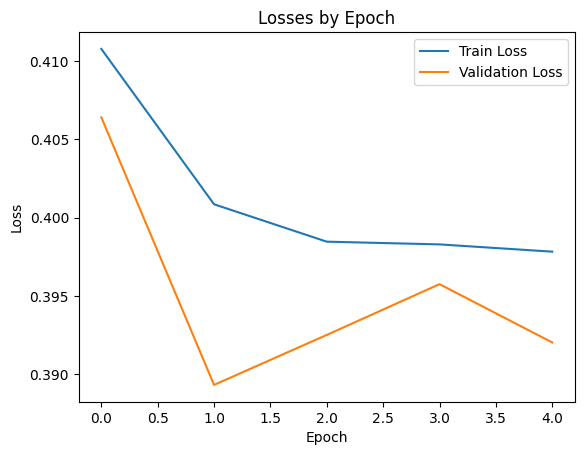

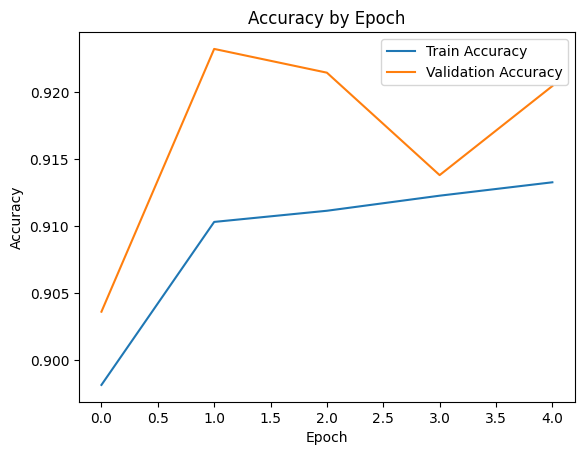


  optimizer      lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.0010         32    0.693147   0.576292  0.693147  0.577128   
1      adam  0.0001         32    0.397822   0.913250  0.392022  0.920434   

   train_time_elapsed  valid_time_elapsed  
0          134.728972           10.085009  
1          132.625608            9.341541  


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: adam
Learning Rate: 1e-05
Batch Size: 32
Training: epoch: 1, loss: 0.43, accuracy: 88.97 in 132.66 seconds
Validation: epoch: 1, loss: 0.40, accuracy: 90.61 in 9.95 seconds
Training: epoch: 2, loss: 0.40, accuracy: 91.46 in 132.75 seconds
Validation: epoch: 2, loss: 0.39, accuracy: 91.52 in 9.06 seconds
Training: epoch: 3, loss: 0.39, accuracy: 92.05 in 133.13 seconds
Validation: epoch: 3, loss: 0.39, accuracy: 92.03 in 9.83 seconds
Training: epoch: 4, loss: 0.39, accuracy: 92.45 in 139.46 seconds
Validation: epoch: 4, loss: 0.38, accuracy: 92.54 in 9.85 seconds
Training: epoch: 5, loss: 0.38, accuracy: 92.80 in 132.42 seconds
Validation: epoch: 5, loss: 0.39, accuracy: 92.11 in 9.22 seconds
Training: epoch: 6, loss: 0.38, accuracy: 92.95 in 132.54 seconds
Validation: epoch: 6, loss: 0.38, accuracy: 92.81 in 9.90 seconds
Training: epoch: 7, loss: 0.38, accuracy: 93.23 in 132.14 seconds
Validation: epoch: 7, loss: 0.38, accuracy: 92.70 in 9.66 seconds
Training: e

<ipython-input-19-301b0e1e8ee4>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


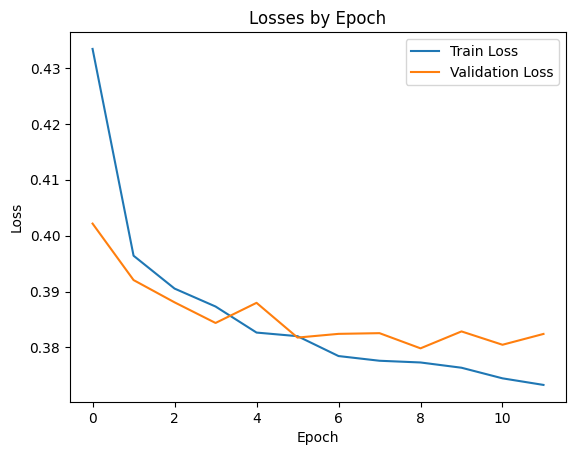

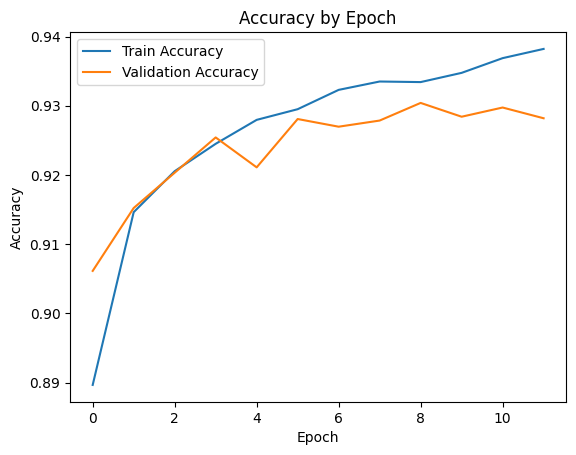


  optimizer       lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.00100         32    0.693147   0.576292  0.693147  0.577128   
1      adam  0.00010         32    0.397822   0.913250  0.392022  0.920434   
2      adam  0.00001         32    0.373301   0.938208  0.382421  0.928191   

   train_time_elapsed  valid_time_elapsed  
0          134.728972           10.085009  
1          132.625608            9.341541  
2          132.157983            9.184650  


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: rmsprop
Learning Rate: 0.001
Batch Size: 32
Training: epoch: 1, loss: 0.89, accuracy: 42.38 in 131.52 seconds
Validation: epoch: 1, loss: 0.89, accuracy: 42.29 in 9.80 seconds
Training: epoch: 2, loss: 0.89, accuracy: 42.37 in 132.44 seconds
Validation: epoch: 2, loss: 0.89, accuracy: 42.29 in 9.34 seconds
Training: epoch: 3, loss: 0.84, accuracy: 46.95 in 131.65 seconds
Validation: epoch: 3, loss: 0.74, accuracy: 57.71 in 9.85 seconds
Training: epoch: 4, loss: 0.74, accuracy: 57.63 in 131.78 seconds
Validation: epoch: 4, loss: 0.74, accuracy: 57.71 in 9.16 seconds
Training: epoch: 5, loss: 0.74, accuracy: 57.63 in 132.04 seconds
Validation: epoch: 5, loss: 0.74, accuracy: 57.71 in 9.82 seconds
Training: epoch: 6, loss: 0.74, accuracy: 57.63 in 130.85 seconds
Validation: epoch: 6, loss: 0.74, accuracy: 57.71 in 9.70 seconds
No improvement for 3 epochs. Training stopped early.


<ipython-input-19-301b0e1e8ee4>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


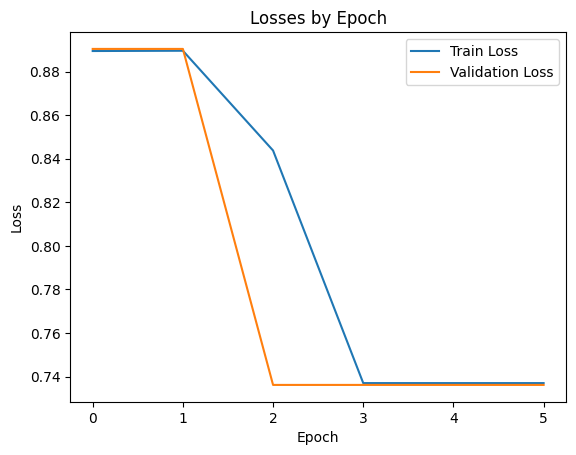

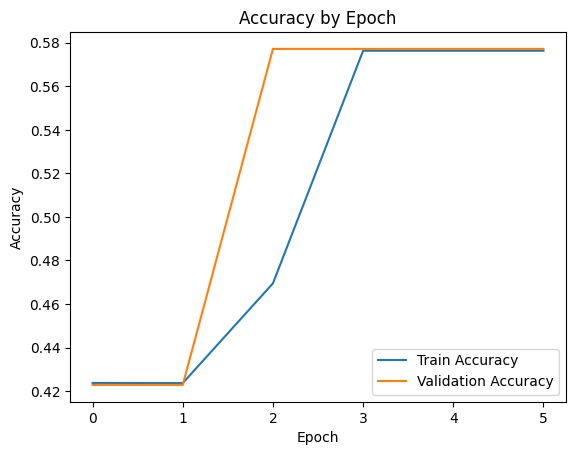


  optimizer       lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.00100         32    0.693147   0.576292  0.693147  0.577128   
1      adam  0.00010         32    0.397822   0.913250  0.392022  0.920434   
2      adam  0.00001         32    0.373301   0.938208  0.382421  0.928191   
3   rmsprop  0.00100         32    0.736970   0.576292  0.736134  0.577128   

   train_time_elapsed  valid_time_elapsed  
0          134.728972           10.085009  
1          132.625608            9.341541  
2          132.157983            9.184650  
3          130.852659            9.699847  


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: rmsprop
Learning Rate: 0.0001
Batch Size: 32
Training: epoch: 1, loss: 0.42, accuracy: 89.35 in 132.67 seconds
Validation: epoch: 1, loss: 0.41, accuracy: 90.31 in 9.85 seconds
Training: epoch: 2, loss: 0.40, accuracy: 90.94 in 131.49 seconds
Validation: epoch: 2, loss: 0.39, accuracy: 91.66 in 9.39 seconds
Training: epoch: 3, loss: 0.40, accuracy: 91.33 in 130.34 seconds
Validation: epoch: 3, loss: 0.39, accuracy: 91.60 in 9.59 seconds
Training: epoch: 4, loss: 0.40, accuracy: 91.37 in 128.47 seconds
Validation: epoch: 4, loss: 0.40, accuracy: 91.35 in 9.58 seconds
Training: epoch: 5, loss: 0.40, accuracy: 91.37 in 128.78 seconds
Validation: epoch: 5, loss: 0.39, accuracy: 91.79 in 9.02 seconds
Training: epoch: 6, loss: 0.40, accuracy: 91.16 in 129.12 seconds
Validation: epoch: 6, loss: 0.39, accuracy: 91.29 in 9.57 seconds
Training: epoch: 7, loss: 0.40, accuracy: 91.43 in 129.17 seconds
Validation: epoch: 7, loss: 0.40, accuracy: 91.43 in 9.66 seconds
Trainin

<ipython-input-19-301b0e1e8ee4>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


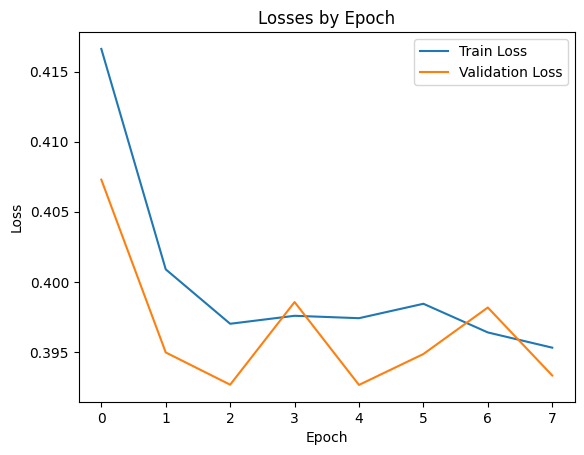

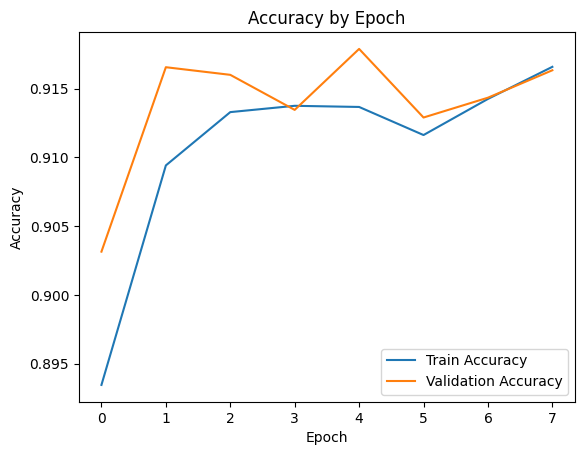


  optimizer       lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.00100         32    0.693147   0.576292  0.693147  0.577128   
1      adam  0.00010         32    0.397822   0.913250  0.392022  0.920434   
2      adam  0.00001         32    0.373301   0.938208  0.382421  0.928191   
3   rmsprop  0.00100         32    0.736970   0.576292  0.736134  0.577128   
4   rmsprop  0.00010         32    0.395298   0.916583  0.393311  0.916334   

   train_time_elapsed  valid_time_elapsed  
0          134.728972           10.085009  
1          132.625608            9.341541  
2          132.157983            9.184650  
3          130.852659            9.699847  
4          129.069960            9.792169  


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: rmsprop
Learning Rate: 1e-05
Batch Size: 32
Training: epoch: 1, loss: 0.42, accuracy: 90.18 in 130.57 seconds
Validation: epoch: 1, loss: 0.40, accuracy: 90.86 in 9.74 seconds
Training: epoch: 2, loss: 0.39, accuracy: 91.68 in 129.86 seconds
Validation: epoch: 2, loss: 0.39, accuracy: 91.90 in 9.67 seconds
Training: epoch: 3, loss: 0.39, accuracy: 92.18 in 129.10 seconds
Validation: epoch: 3, loss: 0.39, accuracy: 91.58 in 9.11 seconds
Training: epoch: 4, loss: 0.39, accuracy: 92.36 in 128.84 seconds
Validation: epoch: 4, loss: 0.38, accuracy: 92.42 in 9.41 seconds
Training: epoch: 5, loss: 0.38, accuracy: 92.58 in 128.70 seconds
Validation: epoch: 5, loss: 0.39, accuracy: 91.91 in 9.60 seconds
Training: epoch: 6, loss: 0.38, accuracy: 92.78 in 128.61 seconds
Validation: epoch: 6, loss: 0.39, accuracy: 92.05 in 9.64 seconds
Training: epoch: 7, loss: 0.38, accuracy: 93.14 in 128.48 seconds
Validation: epoch: 7, loss: 0.38, accuracy: 93.04 in 9.33 seconds
Training

<ipython-input-19-301b0e1e8ee4>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


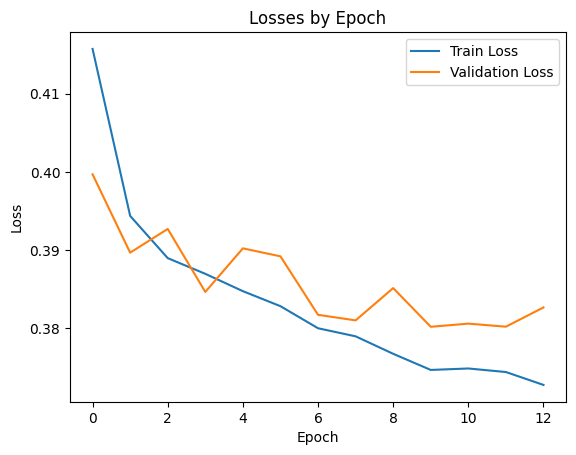

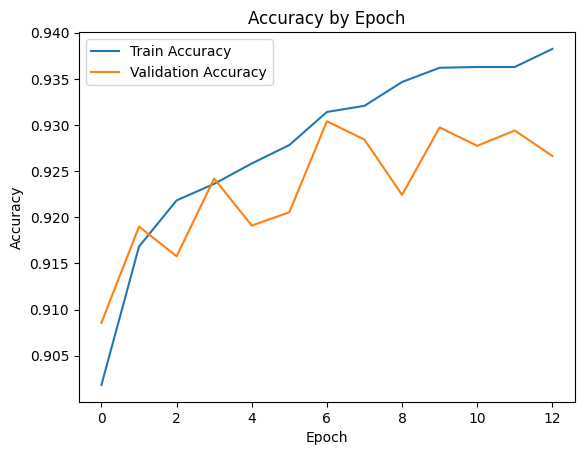


  optimizer       lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.00100         32    0.693147   0.576292  0.693147  0.577128   
1      adam  0.00010         32    0.397822   0.913250  0.392022  0.920434   
2      adam  0.00001         32    0.373301   0.938208  0.382421  0.928191   
3   rmsprop  0.00100         32    0.736970   0.576292  0.736134  0.577128   
4   rmsprop  0.00010         32    0.395298   0.916583  0.393311  0.916334   
5   rmsprop  0.00001         32    0.372700   0.938250  0.382627  0.926640   

   train_time_elapsed  valid_time_elapsed  
0          134.728972           10.085009  
1          132.625608            9.341541  
2          132.157983            9.184650  
3          130.852659            9.699847  
4          129.069960            9.792169  
5          128.533431            9.623123  


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: SGD_momentum
Learning Rate: 0.001
Batch Size: 32
Training: epoch: 1, loss: 0.46, accuracy: 86.67 in 128.45 seconds
Validation: epoch: 1, loss: 0.41, accuracy: 89.65 in 9.60 seconds
Training: epoch: 2, loss: 0.41, accuracy: 90.10 in 128.90 seconds
Validation: epoch: 2, loss: 0.41, accuracy: 90.30 in 9.58 seconds
Training: epoch: 3, loss: 0.40, accuracy: 91.18 in 128.80 seconds
Validation: epoch: 3, loss: 0.40, accuracy: 90.70 in 9.36 seconds
Training: epoch: 4, loss: 0.40, accuracy: 91.37 in 128.49 seconds
Validation: epoch: 4, loss: 0.40, accuracy: 90.77 in 9.16 seconds
Training: epoch: 5, loss: 0.40, accuracy: 91.49 in 128.86 seconds
Validation: epoch: 5, loss: 0.39, accuracy: 91.51 in 9.56 seconds
Training: epoch: 6, loss: 0.39, accuracy: 91.87 in 129.00 seconds
Validation: epoch: 6, loss: 0.39, accuracy: 91.98 in 9.55 seconds
Training: epoch: 7, loss: 0.39, accuracy: 92.08 in 128.74 seconds
Validation: epoch: 7, loss: 0.39, accuracy: 92.09 in 9.67 seconds
Tra

<ipython-input-19-301b0e1e8ee4>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


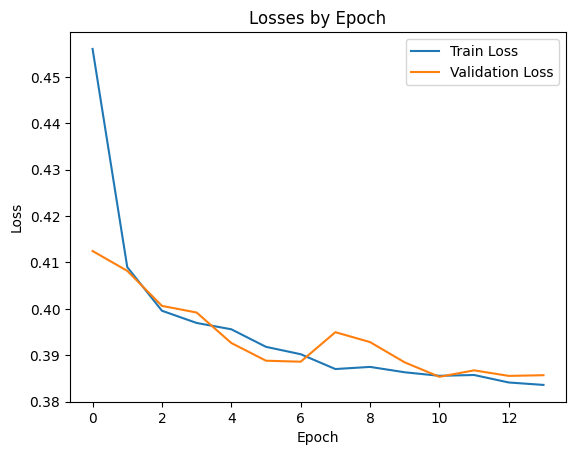

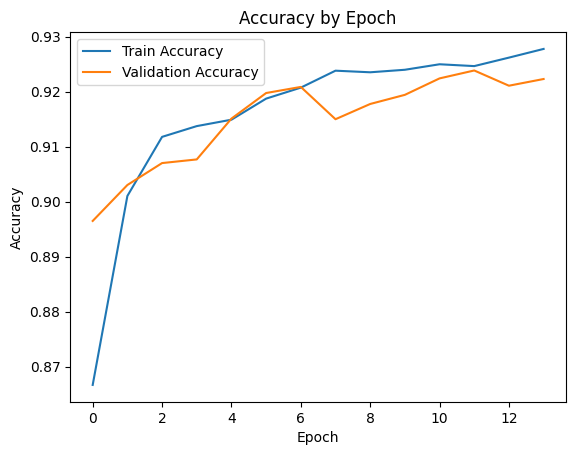


      optimizer       lr batch_size  train_loss  train_acc  val_loss  \
0          adam  0.00100         32    0.693147   0.576292  0.693147   
1          adam  0.00010         32    0.397822   0.913250  0.392022   
2          adam  0.00001         32    0.373301   0.938208  0.382421   
3       rmsprop  0.00100         32    0.736970   0.576292  0.736134   
4       rmsprop  0.00010         32    0.395298   0.916583  0.393311   
5       rmsprop  0.00001         32    0.372700   0.938250  0.382627   
6  SGD_momentum  0.00100         32    0.383599   0.927792  0.385693   

    val_acc  train_time_elapsed  valid_time_elapsed  
0  0.577128          134.728972           10.085009  
1  0.920434          132.625608            9.341541  
2  0.928191          132.157983            9.184650  
3  0.577128          130.852659            9.699847  
4  0.916334          129.069960            9.792169  
5  0.926640          128.533431            9.623123  
6  0.922318          130.349806            9

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: SGD_momentum
Learning Rate: 0.0001
Batch Size: 32
Training: epoch: 1, loss: 0.62, accuracy: 73.83 in 130.08 seconds
Validation: epoch: 1, loss: 0.51, accuracy: 87.97 in 9.75 seconds
Training: epoch: 2, loss: 0.49, accuracy: 87.92 in 129.85 seconds
Validation: epoch: 2, loss: 0.44, accuracy: 89.49 in 9.63 seconds
Training: epoch: 3, loss: 0.45, accuracy: 88.43 in 129.58 seconds
Validation: epoch: 3, loss: 0.43, accuracy: 89.39 in 9.64 seconds
Training: epoch: 4, loss: 0.43, accuracy: 88.97 in 129.42 seconds
Validation: epoch: 4, loss: 0.42, accuracy: 89.69 in 9.66 seconds
Training: epoch: 5, loss: 0.43, accuracy: 89.27 in 131.49 seconds
Validation: epoch: 5, loss: 0.41, accuracy: 90.00 in 10.06 seconds
Training: epoch: 6, loss: 0.42, accuracy: 89.24 in 129.83 seconds
Validation: epoch: 6, loss: 0.41, accuracy: 89.96 in 8.99 seconds
Training: epoch: 7, loss: 0.42, accuracy: 89.51 in 128.01 seconds
Validation: epoch: 7, loss: 0.41, accuracy: 89.93 in 9.55 seconds
T

<ipython-input-19-301b0e1e8ee4>:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results= results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size,'train_loss': train_info["loss"],


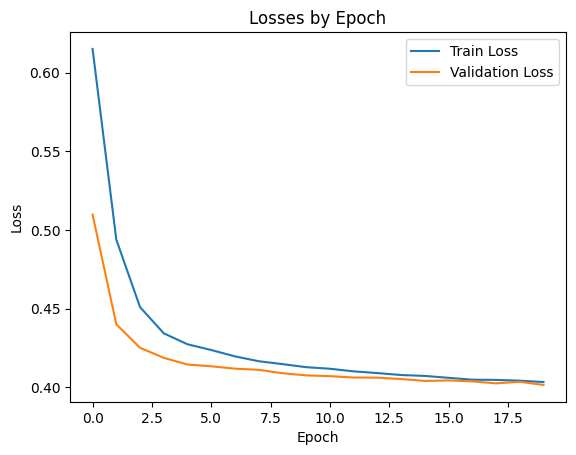

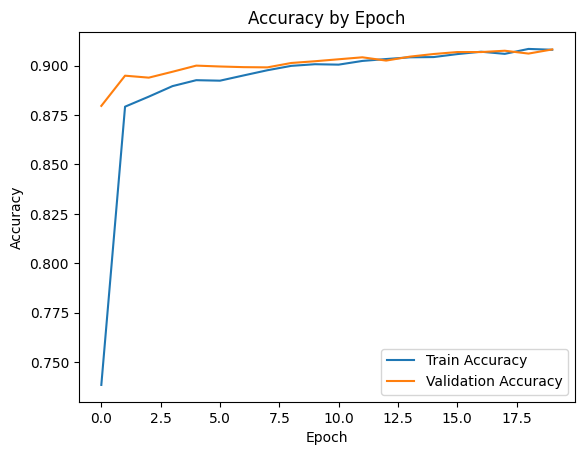


      optimizer       lr batch_size  train_loss  train_acc  val_loss  \
0          adam  0.00100         32    0.693147   0.576292  0.693147   
1          adam  0.00010         32    0.397822   0.913250  0.392022   
2          adam  0.00001         32    0.373301   0.938208  0.382421   
3       rmsprop  0.00100         32    0.736970   0.576292  0.736134   
4       rmsprop  0.00010         32    0.395298   0.916583  0.393311   
5       rmsprop  0.00001         32    0.372700   0.938250  0.382627   
6  SGD_momentum  0.00100         32    0.383599   0.927792  0.385693   
7  SGD_momentum  0.00010         32    0.403308   0.908083  0.401478   

    val_acc  train_time_elapsed  valid_time_elapsed  
0  0.577128          134.728972           10.085009  
1  0.920434          132.625608            9.341541  
2  0.928191          132.157983            9.184650  
3  0.577128          130.852659            9.699847  
4  0.916334          129.069960            9.792169  
5  0.926640          128.5

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: SGD_momentum
Learning Rate: 1e-05
Batch Size: 32
Training: epoch: 1, loss: 0.68, accuracy: 60.71 in 128.70 seconds
Validation: epoch: 1, loss: 0.67, accuracy: 63.04 in 9.70 seconds
Training: epoch: 2, loss: 0.67, accuracy: 64.43 in 128.44 seconds
Validation: epoch: 2, loss: 0.65, accuracy: 66.52 in 9.21 seconds
Training: epoch: 3, loss: 0.65, accuracy: 66.05 in 129.03 seconds
Validation: epoch: 3, loss: 0.63, accuracy: 71.13 in 9.17 seconds
Training: epoch: 4, loss: 0.63, accuracy: 69.80 in 128.93 seconds
Validation: epoch: 4, loss: 0.61, accuracy: 75.76 in 9.61 seconds
Training: epoch: 5, loss: 0.62, accuracy: 73.93 in 129.11 seconds
Validation: epoch: 5, loss: 0.59, accuracy: 80.23 in 9.57 seconds
Training: epoch: 6, loss: 0.60, accuracy: 78.24 in 128.76 seconds
Validation: epoch: 6, loss: 0.57, accuracy: 83.52 in 9.55 seconds
Training: epoch: 7, loss: 0.59, accuracy: 81.62 in 128.98 seconds
Validation: epoch: 7, loss: 0.55, accuracy: 85.43 in 8.97 seconds
Tra

<ipython-input-19-301b0e1e8ee4>:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results= results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size,'train_loss': train_info["loss"],


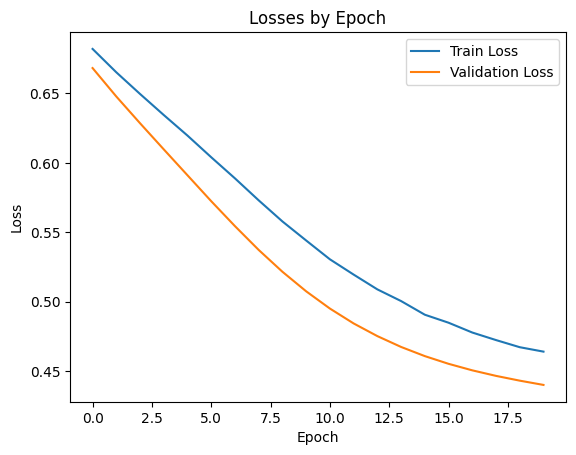

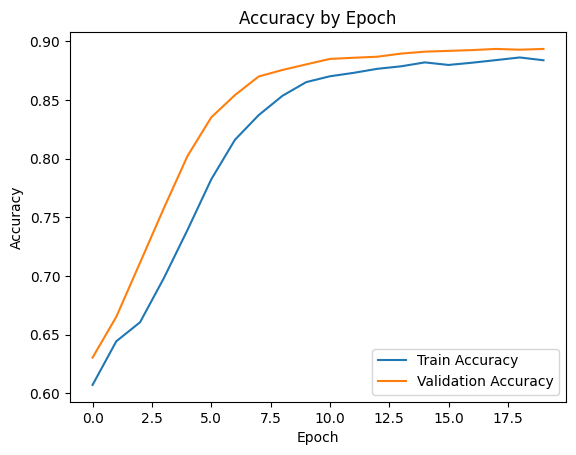


      optimizer       lr batch_size  train_loss  train_acc  val_loss  \
0          adam  0.00100         32    0.693147   0.576292  0.693147   
1          adam  0.00010         32    0.397822   0.913250  0.392022   
2          adam  0.00001         32    0.373301   0.938208  0.382421   
3       rmsprop  0.00100         32    0.736970   0.576292  0.736134   
4       rmsprop  0.00010         32    0.395298   0.916583  0.393311   
5       rmsprop  0.00001         32    0.372700   0.938250  0.382627   
6  SGD_momentum  0.00100         32    0.383599   0.927792  0.385693   
7  SGD_momentum  0.00010         32    0.403308   0.908083  0.401478   
8  SGD_momentum  0.00001         32    0.463878   0.883958  0.439874   

    val_acc  train_time_elapsed  valid_time_elapsed  
0  0.577128          134.728972           10.085009  
1  0.920434          132.625608            9.341541  
2  0.928191          132.157983            9.184650  
3  0.577128          130.852659            9.699847  
4  0.916

In [ ]:
#This first loop will try different optimizers & learning rates

from torch.utils.data import DataLoader
import time

num_epochs = 20 #this is really max_epochs as an early stopping criterion is used
patience = 3 #early stopping - training will stop if validation loss does not
              #improve for 3 epochs

lr_list = [0.001,0.0001,0.00001] #learning rates to be tried
optimizers_list = ['adam',"rmsprop","SGD_momentum"] #optimizers to be tried
                                                    #this choice is explained in the report part

batch_size= 32
eval_every = 1

results= pd.DataFrame(columns=['optimizer', 'lr', "batch_size", 'train_loss', 'train_acc',
                                'val_loss', 'val_acc', 'train_time_elapsed',"valid_time_elapsed"])
                                #this df will store the results of this cell

for optimizer_name in optimizers_list:
  for lr in lr_list:
    losses=[] #stores training losses
    train_acc=[] #stores training accuracies
    vallosses=[] #stores validation losses
    val_acc=[] #stores validation accuracies

    model = VGG16_Updated(2) # binary classification
    model = model.cuda()

    if optimizer_name == 'adam':
      optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == 'rmsprop':
      optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
    else: #SGD w/ momentum
      optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    best_val_loss = float('inf') #best loss starts from inf so that it is worse than the first epoch
    no_improvement_count = 0 #will count how many epochs has there not been an improvement

    print()
    print("-MODEL FOR-")
    print("Optimizer:", optimizer_name)
    print("Learning Rate:", lr)
    print("Batch Size:", batch_size)

    for e in range(1, num_epochs+1):
      train_info = train_one_epoch(train_dataloader, optimizer)
      losses.append(train_info["loss"])
      train_acc.append(train_info["acc"])
      print("Training: epoch: {}, loss: {:.2f}, accuracy: {:.2f} in {:.2f} seconds".format(e, train_info["loss"], 100*train_info["acc"], train_info["time"]))

      if e % eval_every == 0: # evaluate model on validation set every `eval_every` epochs
        val_info = test_val_one_epoch(val_dataloader)
        vallosses.append(val_info["loss"])
        val_acc.append(val_info["acc"])
        print("Validation: epoch: {}, loss: {:.2f}, accuracy: {:.2f} in {:.2f} seconds".format(e, val_info["loss"], 100*val_info["acc"], val_info["time"]))

        if val_info["loss"] < best_val_loss:
          best_val_loss = val_info["loss"]
          no_improvement_count = 0
        else:
          no_improvement_count += 1

        if no_improvement_count == patience:
          print(f"No improvement for {patience} epochs. Training stopped early.")

          results = results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],
                                        'train_acc': train_info["acc"], 'val_loss': val_info["loss"], 'val_acc': val_info["acc"],
                                        'train_time_elapsed': train_info["time"], "valid_time_elapsed":val_info["time"]}, ignore_index=True)
                                        # appends the results to dataframe
                                        #results being accuracies/losses at the last epoch

          plt.plot(losses, label="Train Loss")
          plt.plot(vallosses, label="Validation Loss")
          plt.title("Losses by Epoch")
          plt.xlabel("Epoch")
          plt.ylabel("Loss")
          plt.legend()
          plt.show()

          print()
          plt.plot(train_acc, label="Train Accuracy")
          plt.plot(val_acc, label="Validation Accuracy")
          plt.title("Accuracy by Epoch")
          plt.xlabel("Epoch")
          plt.ylabel("Accuracy")
          plt.legend()
          plt.show()

          print()
          print(results)
          break

        if e==num_epochs:
          results= results.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size,'train_loss': train_info["loss"],
                                        'train_acc': train_info["acc"], 'val_loss': val_info["loss"], 'val_acc': val_info["acc"],
                                        'train_time_elapsed': train_info["time"], "valid_time_elapsed":val_info["time"]}, ignore_index=True)
                                        #appends the results to dataframe
                                        #results being accuracies/losses at the last epoch

          plt.plot(losses, label="Train Loss")
          plt.plot(vallosses, label="Validation Loss")
          plt.title("Losses by Epoch")
          plt.xlabel("Epoch")
          plt.ylabel("Loss")
          plt.legend()
          plt.show()

          print()
          plt.plot(train_acc, label="Train Accuracy")
          plt.plot(val_acc, label="Validation Accuracy")
          plt.title("Accuracy by Epoch")
          plt.xlabel("Epoch")
          plt.ylabel("Accuracy")
          plt.legend()
          plt.show()

          print()
          print(results)

In [ ]:
results

,optimizer,lr,batch_size,train_loss,train_acc,val_loss,val_acc,train_time_elapsed,valid_time_elapsed
0,adam,0.00100,32,0.693147,0.576292,0.693147,0.577128,134.728972,10.085009
1,adam,0.00010,32,0.397822,0.913250,0.392022,0.920434,132.625608,9.341541
2,adam,0.00001,32,0.373301,0.938208,0.382421,0.928191,132.157983,9.184650
3,rmsprop,0.00100,32,0.736970,0.576292,0.736134,0.577128,130.852659,9.699847
4,rmsprop,0.00010,32,0.395298,0.916583,0.393311,0.916334,129.069960,9.792169
5,rmsprop,0.00001,32,0.372700,0.938250,0.382627,0.926640,128.533431,9.623123
6,SGD_momentum,0.00100,32,0.383599,0.927792,0.385693,0.922318,130.349806,9.685722
7,SGD_momentum,0.00010,32,0.403308,0.908083,0.401478,0.908245,128.709513,9.570728
8,SGD_momentum,0.00001,32,0.463878,0.883958,0.439874,0.893617,128.895190,9.430971


In [ ]:
#Based on the highest validation accuracy, Adam optimizer with 1e-5 lr is chosen.

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: adam
Learning Rate: 1e-05
Batch Size: 16
Training: epoch: 1, loss: 0.42, accuracy: 89.99 in 144.74 seconds
Validation: epoch: 1, loss: 0.40, accuracy: 91.19 in 10.28 seconds
Training: epoch: 2, loss: 0.40, accuracy: 91.56 in 139.20 seconds
Validation: epoch: 2, loss: 0.39, accuracy: 91.99 in 10.24 seconds
Training: epoch: 3, loss: 0.39, accuracy: 92.18 in 136.90 seconds
Validation: epoch: 3, loss: 0.39, accuracy: 91.89 in 9.71 seconds
Training: epoch: 4, loss: 0.39, accuracy: 92.58 in 138.68 seconds
Validation: epoch: 4, loss: 0.39, accuracy: 92.15 in 9.59 seconds
Training: epoch: 5, loss: 0.38, accuracy: 92.87 in 139.12 seconds
Validation: epoch: 5, loss: 0.39, accuracy: 92.29 in 9.97 seconds
Training: epoch: 6, loss: 0.38, accuracy: 92.79 in 137.78 seconds
Validation: epoch: 6, loss: 0.38, accuracy: 92.92 in 10.25 seconds
Training: epoch: 7, loss: 0.38, accuracy: 93.01 in 139.38 seconds
Validation: epoch: 7, loss: 0.39, accuracy: 92.59 in 10.24 seconds
Trainin

<ipython-input-19-a9479d80ff19>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_batch = results_batch.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


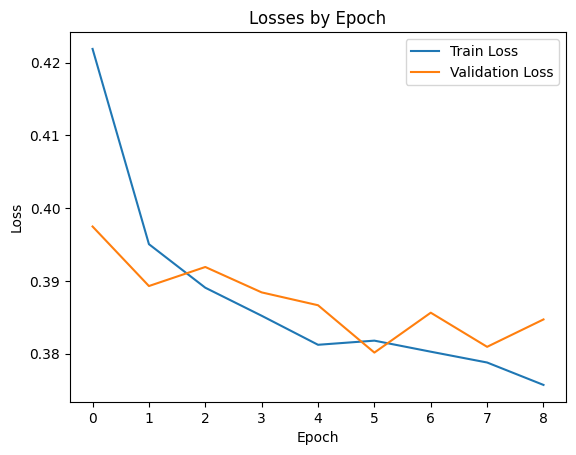

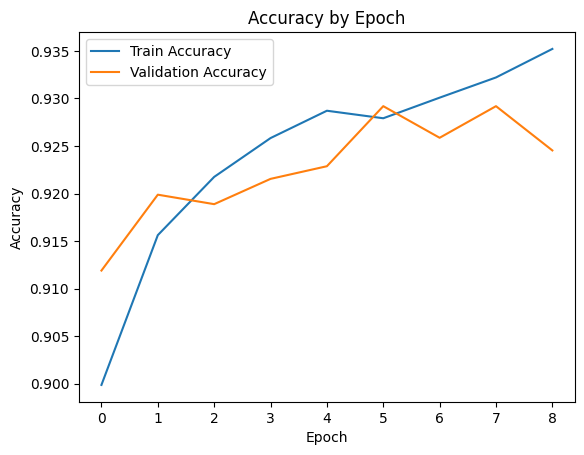


  optimizer       lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.00001         16    0.375703   0.935208  0.384703  0.924535   

   train_time_elapsed  valid_time_elapsed  
0          134.327862           10.070759  


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: adam
Learning Rate: 1e-05
Batch Size: 32
Training: epoch: 1, loss: 0.43, accuracy: 88.77 in 131.49 seconds
Validation: epoch: 1, loss: 0.40, accuracy: 91.22 in 9.70 seconds
Training: epoch: 2, loss: 0.40, accuracy: 91.54 in 130.96 seconds
Validation: epoch: 2, loss: 0.40, accuracy: 91.72 in 9.75 seconds
Training: epoch: 3, loss: 0.39, accuracy: 91.97 in 130.21 seconds
Validation: epoch: 3, loss: 0.39, accuracy: 92.05 in 9.78 seconds
Training: epoch: 4, loss: 0.39, accuracy: 92.65 in 131.17 seconds
Validation: epoch: 4, loss: 0.39, accuracy: 92.27 in 9.81 seconds
Training: epoch: 5, loss: 0.38, accuracy: 92.83 in 130.30 seconds
Validation: epoch: 5, loss: 0.38, accuracy: 92.55 in 9.62 seconds
Training: epoch: 6, loss: 0.38, accuracy: 93.03 in 129.02 seconds
Validation: epoch: 6, loss: 0.38, accuracy: 92.75 in 8.98 seconds
Training: epoch: 7, loss: 0.38, accuracy: 93.22 in 130.14 seconds
Validation: epoch: 7, loss: 0.39, accuracy: 92.25 in 9.63 seconds
Training: e

<ipython-input-19-a9479d80ff19>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_batch = results_batch.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


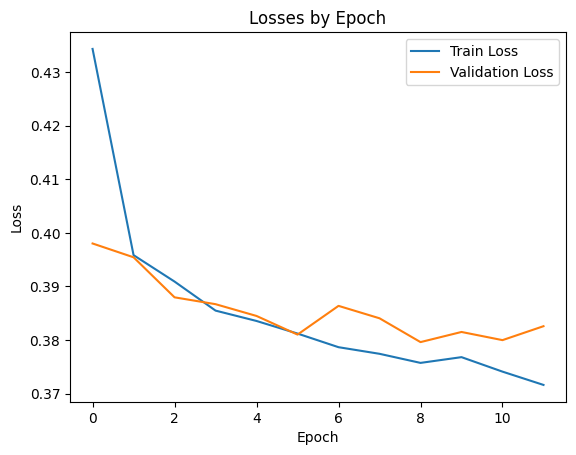

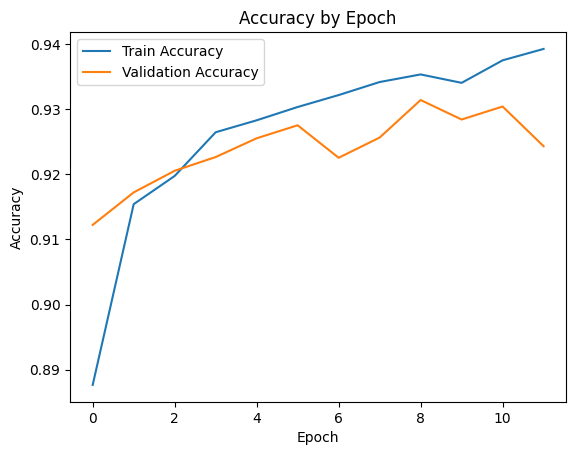


  optimizer       lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.00001         16    0.375703   0.935208  0.384703  0.924535   
1      adam  0.00001         32    0.371632   0.939250  0.382583  0.924313   

   train_time_elapsed  valid_time_elapsed  
0          134.327862           10.070759  
1          128.893714            9.669992  


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-MODEL FOR-
Optimizer: adam
Learning Rate: 1e-05
Batch Size: 64
Training: epoch: 1, loss: 0.45, accuracy: 88.13 in 131.09 seconds
Validation: epoch: 1, loss: 0.40, accuracy: 91.01 in 9.81 seconds
Training: epoch: 2, loss: 0.40, accuracy: 91.30 in 130.80 seconds
Validation: epoch: 2, loss: 0.40, accuracy: 90.93 in 9.86 seconds
Training: epoch: 3, loss: 0.39, accuracy: 91.84 in 130.65 seconds
Validation: epoch: 3, loss: 0.39, accuracy: 91.67 in 9.79 seconds
Training: epoch: 4, loss: 0.39, accuracy: 92.30 in 129.95 seconds
Validation: epoch: 4, loss: 0.39, accuracy: 92.01 in 9.83 seconds
Training: epoch: 5, loss: 0.39, accuracy: 92.59 in 131.42 seconds
Validation: epoch: 5, loss: 0.39, accuracy: 92.44 in 9.87 seconds
Training: epoch: 6, loss: 0.38, accuracy: 92.90 in 131.26 seconds
Validation: epoch: 6, loss: 0.39, accuracy: 92.11 in 9.75 seconds
Training: epoch: 7, loss: 0.38, accuracy: 92.96 in 129.93 seconds
Validation: epoch: 7, loss: 0.39, accuracy: 91.93 in 9.61 seconds
Training: e

<ipython-input-19-a9479d80ff19>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_batch = results_batch.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


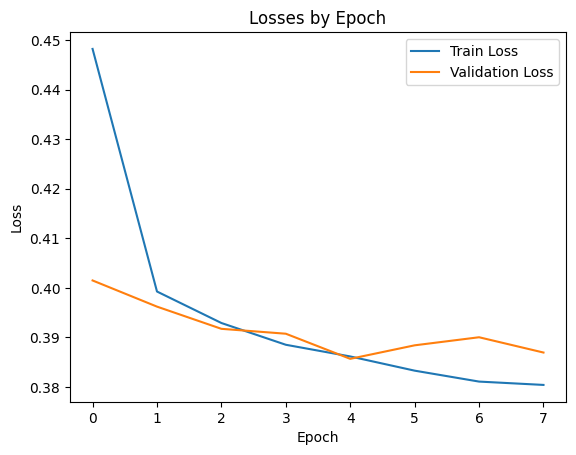

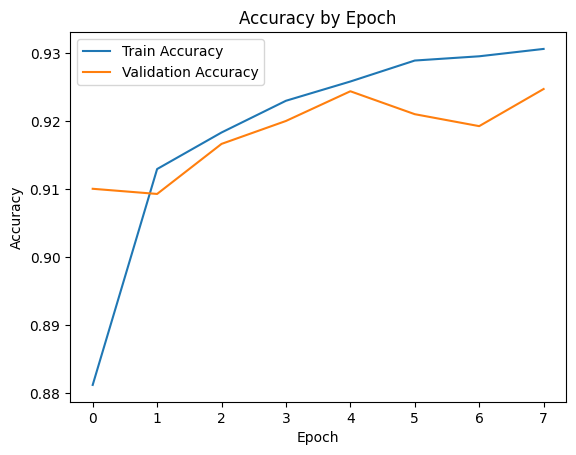


  optimizer       lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.00001         16    0.375703   0.935208  0.384703  0.924535   
1      adam  0.00001         32    0.371632   0.939250  0.382583  0.924313   
2      adam  0.00001         64    0.380411   0.930667  0.386945  0.924772   

   train_time_elapsed  valid_time_elapsed  
0          134.327862           10.070759  
1          128.893714            9.669992  
2          130.968555            9.142694  


In [ ]:
#This loop will try different batch sizes.
#Batch sizes are tried seperately not to exceed Colab limits.

num_epochs = 20 #this is really max_epochs as an early stopping criterion is used
patience = 3 #early stopping - training will stop if validation loss does not
              #improve for over 3 epochs

batch_list= [16,32,64] #batch sizes to be tried
eval_every = 1
lr=0.00001
optimizer_name="adam"
results_batch= pd.DataFrame(columns=['optimizer', 'lr', "batch_size", 'train_loss', 'train_acc',
                                'val_loss', 'val_acc', 'train_time_elapsed',"valid_time_elapsed"])
                                #this df will store the results of this cell

for batch_size in batch_list:
  losses=[] #stores training losses
  train_acc=[] #stores training accuracies
  vallosses=[] #stores validation losses
  val_acc=[] #stores validation accuracies

  model = VGG16_Updated(2) # binary classification
  model = model.cuda()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

  best_val_loss = float('inf') #best loss starts from inf so that it is worse than the first epoch
  no_improvement_count = 0 #will count how many epochs has there not been an improvement

  print()
  print("-MODEL FOR-")
  print("Optimizer:", optimizer_name)
  print("Learning Rate:", lr)
  print("Batch Size:", batch_size)

  for e in range(1, num_epochs+1):
    train_info = train_one_epoch(train_dataloader, optimizer)
    losses.append(train_info["loss"])
    train_acc.append(train_info["acc"])
    print("Training: epoch: {}, loss: {:.2f}, accuracy: {:.2f} in {:.2f} seconds".format(e, train_info["loss"], 100*train_info["acc"], train_info["time"]))

    if e % eval_every == 0: # evaluate model on validation set every `eval_every` epochs
      val_info = test_val_one_epoch(val_dataloader)
      vallosses.append(val_info["loss"])
      val_acc.append(val_info["acc"])
      print("Validation: epoch: {}, loss: {:.2f}, accuracy: {:.2f} in {:.2f} seconds".format(e, val_info["loss"], 100*val_info["acc"], val_info["time"]))

      if val_info["loss"] < best_val_loss:
        best_val_loss = val_info["loss"]
        no_improvement_count = 0
      else:
        no_improvement_count += 1

      if no_improvement_count == patience:
        print(f"No improvement for {patience} epochs. Training stopped early.")

        results_batch = results_batch.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],
                                        'train_acc': train_info["acc"], 'val_loss': val_info["loss"], 'val_acc': val_info["acc"],
                                        'train_time_elapsed': train_info["time"], "valid_time_elapsed":val_info["time"]}, ignore_index=True)
                                        # appends the results to dataframe
                                        #results being accuracies/losses at the last epoch

        plt.plot(losses, label="Train Loss")
        plt.plot(vallosses, label="Validation Loss")
        plt.title("Losses by Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        print()
        plt.plot(train_acc, label="Train Accuracy")
        plt.plot(val_acc, label="Validation Accuracy")
        plt.title("Accuracy by Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

        print()
        print(results_batch)
        break

    if e==num_epochs:
      results_batch= results_batch.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size,'train_loss': train_info["loss"],
                                        'train_acc': train_info["acc"], 'val_loss': val_info["loss"], 'val_acc': val_info["acc"],
                                        'train_time_elapsed': train_info["time"], "valid_time_elapsed":val_info["time"]}, ignore_index=True)
                                        #appends the results to dataframe
                                        #results being accuracies/losses at the last epoch

      plt.plot(losses, label="Train Loss")
      plt.plot(vallosses, label="Validation Loss")
      plt.title("Losses by Epoch")
      plt.xlabel("Epoch")
      plt.ylabel("Loss")
      plt.legend()
      plt.show()

      print()
      plt.plot(train_acc, label="Train Accuracy")
      plt.plot(val_acc, label="Validation Accuracy")
      plt.title("Accuracy by Epoch")
      plt.xlabel("Epoch")
      plt.ylabel("Accuracy")
      plt.legend()
      plt.show()

      print()
      print(results_batch)

In [ ]:
results_batch

,optimizer,lr,batch_size,train_loss,train_acc,val_loss,val_acc,train_time_elapsed,valid_time_elapsed
0,adam,0.00001,16,0.375703,0.935208,0.384703,0.924535,134.327862,10.070759
1,adam,0.00001,32,0.371632,0.939250,0.382583,0.924313,128.893714,9.669992
2,adam,0.00001,64,0.380411,0.930667,0.386945,0.924772,130.968555,9.142694


In [ ]:
#Based on the validation accuracies, batch size of 64 is chosen.

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



-FINAL MODEL TRAINING-
Final Model Optimizer: adam
Final Model Learning Rate: 1e-05
Final Model Batch Size: 64
Training: epoch: 1, loss: 0.45, accuracy: 88.06 in 132.98 seconds
Validation: epoch: 1, loss: 0.40, accuracy: 90.71 in 10.10 seconds
Training: epoch: 2, loss: 0.40, accuracy: 91.33 in 140.07 seconds
Validation: epoch: 2, loss: 0.40, accuracy: 91.34 in 11.00 seconds
Training: epoch: 3, loss: 0.39, accuracy: 91.69 in 145.99 seconds
Validation: epoch: 3, loss: 0.39, accuracy: 92.14 in 10.02 seconds
Training: epoch: 4, loss: 0.39, accuracy: 92.35 in 133.98 seconds
Validation: epoch: 4, loss: 0.39, accuracy: 92.37 in 9.98 seconds
Training: epoch: 5, loss: 0.38, accuracy: 92.67 in 132.63 seconds
Validation: epoch: 5, loss: 0.39, accuracy: 92.40 in 10.02 seconds
Training: epoch: 6, loss: 0.38, accuracy: 92.62 in 133.08 seconds
Validation: epoch: 6, loss: 0.38, accuracy: 92.43 in 9.16 seconds
Training: epoch: 7, loss: 0.38, accuracy: 93.10 in 132.63 seconds
Validation: epoch: 7, loss

<ipython-input-21-849634adc6cd>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_final = results_final.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],


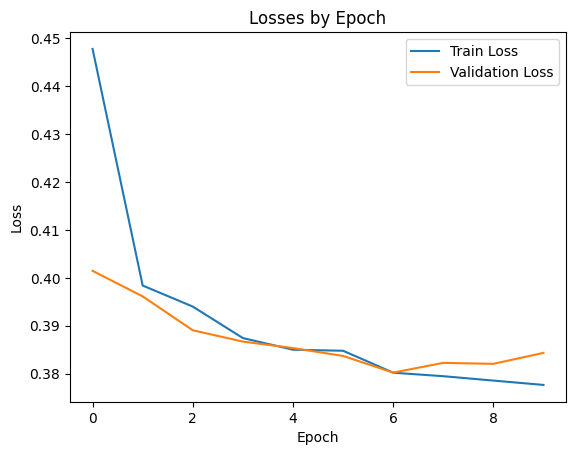

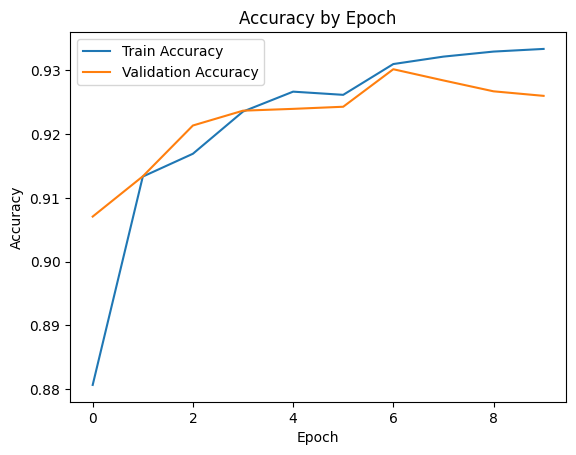


  optimizer       lr batch_size  train_loss  train_acc  val_loss   val_acc  \
0      adam  0.00001         64    0.377631   0.933375  0.384322  0.926007   

   train_time_elapsed  valid_time_elapsed  
0          130.463366            9.118447  


In [ ]:
#This cell trains the final model with the selected hyperparameters.

from torch.utils.data import DataLoader
import time

num_epochs = 20
patience = 3

batch_size=64 #batch sizes to be tried
eval_every = 1
lr=0.00001
optimizer_name="adam"
results_final= pd.DataFrame(columns=['optimizer', 'lr', "batch_size", 'train_loss', 'train_acc',
                                'val_loss', 'val_acc', 'train_time_elapsed',"valid_time_elapsed"])
                                #this df will store the results of this cell


losses=[] #stores training losses
train_acc=[] #stores training accuracies
vallosses=[] #stores validation losses
val_acc=[] #stores validation accuracies

model = VGG16_Updated(2) # binary classification
model = model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

best_val_loss = float('inf') #best loss starts from inf so that it is worse than the first epoch
no_improvement_count = 0 #will count how many epochs has there not been an improvement

print()
print("-FINAL MODEL TRAINING-")
print("Final Model Optimizer:", optimizer_name)
print("Final Model Learning Rate:", lr)
print("Final Model Batch Size:", batch_size)

for e in range(1, num_epochs+1):
  train_info = train_one_epoch(train_dataloader, optimizer)
  losses.append(train_info["loss"])
  train_acc.append(train_info["acc"])
  print("Training: epoch: {}, loss: {:.2f}, accuracy: {:.2f} in {:.2f} seconds".format(e, train_info["loss"], 100*train_info["acc"], train_info["time"]))

  if e % eval_every == 0: # evaluate model on validation set every `eval_every` epochs
    val_info = test_val_one_epoch(val_dataloader)
    vallosses.append(val_info["loss"])
    val_acc.append(val_info["acc"])
    print("Validation: epoch: {}, loss: {:.2f}, accuracy: {:.2f} in {:.2f} seconds".format(e, val_info["loss"], 100*val_info["acc"], val_info["time"]))

    if val_info["loss"] < best_val_loss:
      best_val_loss = val_info["loss"]
      no_improvement_count = 0
    else:
      no_improvement_count += 1

    if no_improvement_count == patience:
      print(f"No improvement for {patience} epochs. Training stopped early.")

      results_final = results_final.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size, 'train_loss': train_info["loss"],
                                        'train_acc': train_info["acc"], 'val_loss': val_info["loss"], 'val_acc': val_info["acc"],
                                        'train_time_elapsed': train_info["time"], "valid_time_elapsed":val_info["time"]}, ignore_index=True)
                                        # appends the results to dataframe
                                        #results being accuracies/losses at the last epoch

      plt.plot(losses, label="Train Loss")
      plt.plot(vallosses, label="Validation Loss")
      plt.title("Losses by Epoch")
      plt.xlabel("Epoch")
      plt.ylabel("Loss")
      plt.legend()
      plt.show()

      print()
      plt.plot(train_acc, label="Train Accuracy")
      plt.plot(val_acc, label="Validation Accuracy")
      plt.title("Accuracy by Epoch")
      plt.xlabel("Epoch")
      plt.ylabel("Accuracy")
      plt.legend()
      plt.show()

      print()
      print(results_final)
      break

  if e==num_epochs:
    results_final= results_final.append({'optimizer': optimizer_name, 'lr': lr, "batch_size": batch_size,'train_loss': train_info["loss"],
                                        'train_acc': train_info["acc"], 'val_loss': val_info["loss"], 'val_acc': val_info["acc"],
                                        'train_time_elapsed': train_info["time"], "valid_time_elapsed":val_info["time"]}, ignore_index=True)
                                        #appends the results to dataframe
                                        #results being accuracies/losses at the last epoch

    plt.plot(losses, label="Train Loss")
    plt.plot(vallosses, label="Validation Loss")
    plt.title("Losses by Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    print()
    plt.plot(train_acc, label="Train Accuracy")
    plt.plot(val_acc, label="Validation Accuracy")
    plt.title("Accuracy by Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    print()
    print(results_final)

In [ ]:
results_final

,optimizer,lr,batch_size,train_loss,train_acc,val_loss,val_acc,train_time_elapsed,valid_time_elapsed
0,adam,0.00001,64,0.377631,0.933375,0.384322,0.926007,130.463366,9.118447


## Testing the Classifier



In [ ]:
#since the original test_val_one_epoch function does not return predictions
#a new function is created to return predicted & actual labels

def predict(test_loader):
    predictions = []
    true_labels = []
    model.eval()
    with torch.no_grad():
        for i, sample in enumerate(test_loader):
            imgs = sample["img"]
            labels = sample["label"]

            imgs = imgs.cuda()
            labels = labels.cuda()

            logits = model(imgs)
            preds = torch.argmax(logits, dim=1) # converts predictions into labels

            true_labels.append(labels.cpu().numpy())# appends true labels and predicted labels to the lists
            predictions.append(preds.cpu().numpy())

    predictions = np.concatenate(predictions, axis=0) # converts the predictions to binary values
    true_labels = np.concatenate(true_labels, axis=0)
    predictions = np.where(predictions > 0.5, 1, 0)
    return predictions, true_labels

Test Accuracy: 0.9222
Test Loss: 0.3869
Test Time Elapsed: 10.5825
Sensitivity: 0.86415
Recall: 0.94298



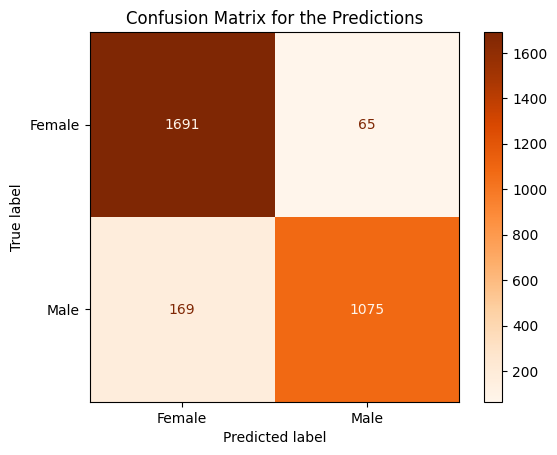

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

batch_size=64
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
#class CelebADataset ensures data augmentation is only done for the training set

test_info=test_val_one_epoch(test_dataloader)
print("Test Accuracy:" ,format(test_info["acc"],".4f"))
print("Test Loss:" ,format(test_info["loss"],".4f"))
print("Test Time Elapsed:" ,format(test_info["time"],".4f"))

predictions, true_labels = predict(test_dataloader)
tn, fp, fn, tp = confusion_matrix(true_labels, predictions).ravel()
sensitivity = tp / (tp + fn)
recall = tp / (tp + fp)

print(f'Sensitivity: {sensitivity:.5f}')
print(f'Recall: {recall:.5f}')
print()

cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Female","Male"])
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Oranges, ax=ax)
ax.set_title('Confusion Matrix for the Predictions')
plt.show()

In [ ]:
prediction_results = pd.merge(test_df, data, on=['image_id',"Male"], how='left')
prediction_results['Predictions'] = predictions
prediction_results.to_csv('submission_AtraBahceci.csv', index=False)

In [ ]:
accuracy_score(prediction_results["Male"], prediction_results["Predictions"])
#to check that the df merge was correct

0.922